In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise 2
For this task you have to program the back-propogation (BP) for multi layered perceptron (MLP). Design your implementation for general NN with arbitrary many hidden layers. The test case is as follows:  2-2-1 multi layered perceptron (MLP) with sigmoid activation function on XOR data. 

a. Experiments with initial weights

i. Train the network with zero initial weights i.e. wij = 0.

ii. Train with random initial weights

In [9]:
class NeuralNetwork:

    def __init__(self,
                 _no_input_neuron,
                 _hidden_config,
                 _no_output_neuron,
                 _input_data_set,
                 _desired_output,
                 _learning_rate,
                 _random_initial_weight):

        self.no_of_input_neurons = _no_input_neuron
        self._hidden_config = _hidden_config
        self.no_of_layers = len(_hidden_config)
        self.no_of_hidden_neurons = _hidden_config[0]
        self.no_of_output_neurons = _no_output_neuron

        self.input_data_set = _input_data_set
        self.desired_output = _desired_output
        
        self.learning_rate = _learning_rate
        self.random_initial_weight = _random_initial_weight
        
    def generate_weight(self,is_random,_size):
        return np.random.uniform(size=_size) if is_random else np.zeros(_size)
        
    def sigmoid (self,x): 
        return 1/(1 + np.exp(-x)) 
    
    def derivative_(self,x): 
        return x * (1 - x)
    
    def local_field(self,x,w):
        return np.dot(x,w)
    
    def error(self,y):
        return self.desired_output - y
    
    def delta(self,sigma_tic,summed_error,flag = False):
        return summed_error * sigma_tic        
#         return np.dot(sigma_tic,summed_error) if flag else sigma_tic*summed_error

    def backpropagation(self,fig_title):
        
        # weights from input layer to hidden layer
        Wh = self.generate_weight(self.random_initial_weight,(self.no_of_input_neurons, self._hidden_config[0]))
        # weights from hidden layer to output layer
        Wz = self.generate_weight(self.random_initial_weight,(self._hidden_config[0],self.no_of_output_neurons))
        
        w_0 = []
        w_1 = []
        
        avg_error = float('inf')
        epochs = 0
        
        # In zero initial weight case the error will be always same,
        # so we need to break the loop after some maximum epoch limit
        while avg_error > 0.01 and epochs < 1000000:
            #activation result from hidden layer neurons
            H = self.sigmoid(np.dot(bp.input_data_set, Wh))
            #activatiion result from output neurons
            Z = self.sigmoid(np.dot(H, Wz))  
            #error calculation
            E = self.desired_output - Z
            #calculating delta_j for output neuron
            dZ = E * self.derivative_(Z) 
            #calculating delta_j for hidden neuron
            dH = dZ.dot(Wz.T) * self.derivative_(H)
            
            #updating weights using backpropagation
            Wz +=  self.learning_rate * H.T.dot(dZ)
            Wh +=  self.learning_rate * self.input_data_set.T.dot(dH) 
            
            w_0.append(Wz[0,:][0])
            w_1.append(Wz[1,:][0])
            avg_error = (np.average(E**2))
            epochs += 1
            
        w_0 = np.asarray(w_0)
        w_1 = np.asarray(w_1)
        
        plt.plot(w_0,w_1)
        plt.xlabel('w0 -->')
        plt.ylabel('w1 -->')
        plt.title(fig_title)
        return E,Wh,Wz,epochs

In [10]:
"""
parameters required to init NeuralNetwork class:
    1. number of input layer
    2. number of hidden neurons in each hidden layers
    3. input data set
    4. desired output set
    5. learning rate
    6. Random initial weight or zero initial weight (True or False)
"""

'\nparameters required to init NeuralNetwork class:\n    1. number of input layer\n    2. number of hidden neurons in each hidden layers\n    3. input data set\n    4. desired output set\n    5. learning rate\n    6. Random initial weight or zero initial weight (True or False)\n'

Error : 
[[-0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]]
weights from input to hidden layer : 
[[ 0.  0.]
 [ 0.  0.]]
weights from hidden to output layer : 
[[ 0.]
 [ 0.]]
Number of epochs :  1000000


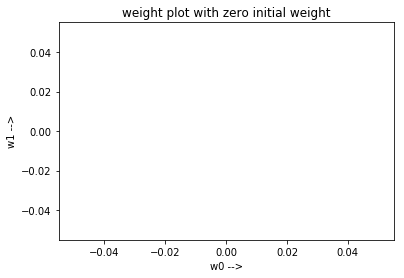

In [12]:
"""
case 1: start with zero weights
    If we start with zero weights, then all hidden neurons will get zero signal 
    even the real input is some non-zero number.
    By using the given sample input, observed that the error is always same and the weight vector is always zero.
    To avoid this symmetry condition, we always start learning process with random weights initialization 
    since the error is always same, we breaking the learning process after some number of epochs (100000000)
"""
bp = NeuralNetwork(2,
                     [2],
                     1,
                     np.array([[0,0],[0,1],[1,0],[1,1]]),
                     np.array([[0],[1],[1],[0]]),
                     0.1,False)

error,weights_hidden_layer,weights_output_layer,epochs = bp.backpropagation("weight plot with zero initial weight")
print "Error : \n", error
print "weights from input to hidden layer : \n", weights_hidden_layer
print "weights from hidden to output layer : \n", weights_output_layer
print "Number of epochs : ", epochs

Error : 
[[-0.05269252]
 [ 0.09943544]
 [ 0.09943568]
 [-0.13209317]]
weights from input to hidden layer : 
[[ 0.90718746  7.35385204]
 [ 0.90717725  7.34991048]]
weights from hidden to output layer : 
[[-27.80466028]
 [ 22.0263288 ]]
Number of epochs :  53181


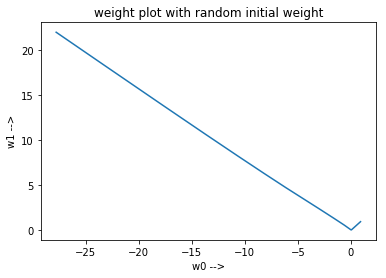

In [13]:
"""
case 2: start with random weights
        If we start with random weights the error is reducing proportional to the learning rate
"""
bp = NeuralNetwork(2,
                     [2],
                     1,
                     np.array([[0,0],[0,1],[1,0],[1,1]]),
                     np.array([[0],[1],[1],[0]]),
                     0.1,True)

error,weights_hidden_layer,weights_output_layer,epochs = bp.backpropagation("weight plot with random initial weight")
print "Error : \n", error
print "weights from input to hidden layer : \n", weights_hidden_layer
print "weights from hidden to output layer : \n", weights_output_layer
print "Number of epochs : ", epochs

Compare and comment on the convergence.

b. Experiment with different learning rates e.g. 0.1, 0.3, 0.5, 0.9..

Compare the convergence and plot some resulting surfaces. You are not allowed to use any neural network toolbox for this solution.

Error : 
[[-0.05269241]
 [ 0.09943539]
 [ 0.09943512]
 [-0.13209275]]
weights from input to hidden layer : 
[[ 7.34996298  0.90717624]
 [ 7.35468409  0.90718847]]
weights from hidden to output layer : 
[[ 22.02632994]
 [-27.80466579]]
Number of epochs :  51332


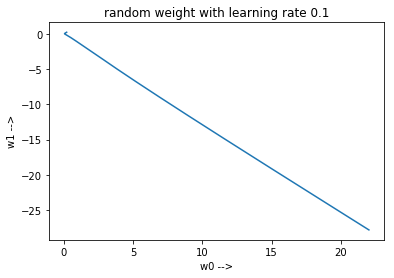

In [14]:
"""
case b (i): start with random weights and learning rate is 0.1
"""
bp = NeuralNetwork(2,
                     [2],
                     1,
                     np.array([[0,0],[0,1],[1,0],[1,1]]),
                     np.array([[0],[1],[1],[0]]),
                     0.1,True)
error,weights_hidden_layer,weights_output_layer,epochs = bp.backpropagation("random weight with learning rate 0.1")
print "Error : \n", error
print "weights from input to hidden layer : \n", weights_hidden_layer
print "weights from hidden to output layer : \n", weights_output_layer
print "Number of epochs : ", epochs

Error : 
[[-0.0526904 ]
 [ 0.09943258]
 [ 0.09943261]
 [-0.13208929]]
weights from input to hidden layer : 
[[ 0.90718634  7.35197211]
 [ 0.90718506  7.35147656]]
weights from hidden to output layer : 
[[-27.80544949]
 [ 22.02697059]]
Number of epochs :  18242


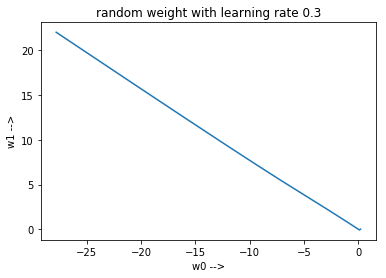

In [15]:
"""
case b (i): start with random weights and learning rate is 0.3
"""
bp = NeuralNetwork(2,
                     [2],
                     1,
                     np.array([[0,0],[0,1],[1,0],[1,1]]),
                     np.array([[0],[1],[1],[0]]),
                     0.3,True)

error,weights_hidden_layer,weights_output_layer,epochs = bp.backpropagation("random weight with learning rate 0.3")
print "Error : \n", error
print "weights from input to hidden layer : \n", weights_hidden_layer
print "weights from hidden to output layer : \n", weights_output_layer
print "Number of epochs : ", epochs

Error : 
[[-0.05269229]
 [ 0.09943524]
 [ 0.09943538]
 [-0.13209285]]
weights from input to hidden layer : 
[[ 7.35288931  0.90718848]
 [ 7.35051739  0.90718233]]
weights from hidden to output layer : 
[[ 22.026913  ]
 [-27.80537836]]
Number of epochs :  11912


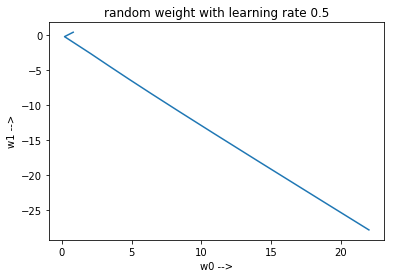

In [16]:
"""
case b (i): start with random weights and learning rate is 0.5
"""
bp = NeuralNetwork(2,
                     [2],
                     1,
                     np.array([[0,0],[0,1],[1,0],[1,1]]),
                     np.array([[0],[1],[1],[0]]),
                     0.5,True)

error,weights_hidden_layer,weights_output_layer,epochs = bp.backpropagation("random weight with learning rate 0.5")
print "Error : \n", error
print "weights from input to hidden layer : \n", weights_hidden_layer
print "weights from hidden to output layer : \n", weights_output_layer
print "Number of epochs : ", epochs

Error : 
[[-0.05269351]
 [ 0.09943465]
 [ 0.09943594]
 [-0.13209267]]
weights from input to hidden layer : 
[[ 7.36797856  0.90721451]
 [ 7.34588472  0.90715754]]
weights from hidden to output layer : 
[[ 22.02703362]
 [-27.80557484]]
Number of epochs :  6567


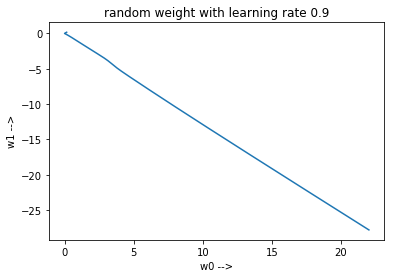

In [17]:
"""
case b (i): start with random weights and learning rate is 0.9
"""
bp = NeuralNetwork(2,
                     [2],
                     1,
                     np.array([[0,0],[0,1],[1,0],[1,1]]),
                     np.array([[0],[1],[1],[0]]),
                     0.9,True)

error,weights_hidden_layer,weights_output_layer,epochs = bp.backpropagation("random weight with learning rate 0.9")
print "Error : \n", error
print "weights from input to hidden layer : \n", weights_hidden_layer
print "weights from hidden to output layer : \n", weights_output_layer
print "Number of epochs : ", epochs

# observations with different learning rate

By increasing the learning rate, observed that error and number of epochs is reducing significantly faster. In case one, with learning rate 0.1 the error is [[-0.03347088] [ 0.07031518] [ 0.07031523] [-0.09374767]] and with learning rate 0.9 the error is reduced to [[-0.00719604]
 [ 0.02115464]
 [ 0.02115463]
 [-0.02845579]].
 
But we are not sure, the network found the optimal solution with the huge learning rate or it stuck with local minima.